# Lendo as imagens

Cada imagem será lida e redimensionada para 300x300 pixels

In [2]:
import numpy as np
import cv2

In [3]:
path_train_images = ['images/train/image_cat_1.png', 'images/train/image_cat_2.png', 'images/train/image_cat_3.png',
               'images/train/image_cham_1.png', 'images/train/image_cham_2.png', 'images/train/image_cham_3.png',
               'images/train/image_dog_1.png', 'images/train/image_dog_2.png', 'images/train/image_dog_3.png',
                'images/train/image_goat_1.png', 'images/train/image_goat_2.png', 'images/train/image_goat_3.png']


In [4]:
train_images = []
for path in path_train_images:#iglob('images/train/*.png'):
    img = cv2.imread(path,0)
    img = cv2.resize(img,(300,300))
    train_images.append(img)

In [5]:
train_images = np.array(train_images)
train_images.shape

(12, 300, 300)

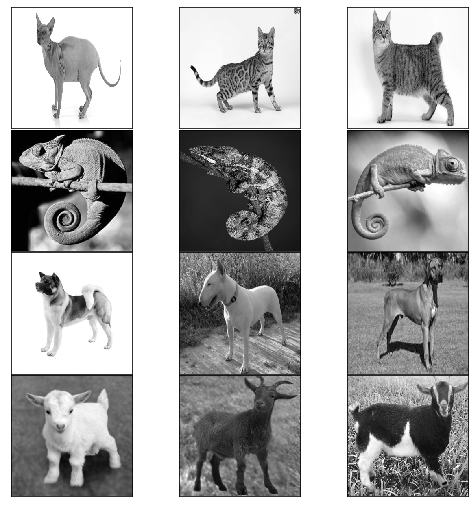

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

fig, axes = plt.subplots(4,3,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i],cmap='gray')

# PCA e projeções usando numpy

In [12]:
print(train_images.shape)
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1]*train_images.shape[2])
print(train_images.shape)

(12, 300, 300)
(12, 90000)


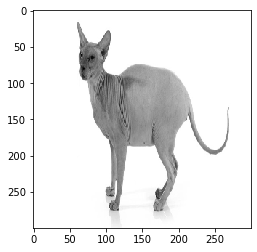

In [15]:
#testando se consigo voltar
imagem0 = train_images[0]
imagem0 = imagem0.reshape((300,300))
plt.imshow(imagem0, cmap='gray')

In [17]:
train_images_transpose = train_images.T
print(train_images_transpose.shape)

(90000, 12)


In [23]:
medias = np.mean(train_images_transpose, axis=1)
medias.shape

(90000,)

In [24]:
#calculando matriz de covariancia
cov_mat = np.cov(train_images)
cov_mat.shape

(12, 12)

In [59]:
#calculando autovalores e autovetores a partir da matriz de covariancia
eig_val, eig_vec = np.linalg.eig(cov_mat)
print(eig_val.shape)
print(eig_vec.shape)

#Explicação pq os autovetores são menores do a dimensão dos dados: 
#https://faithfull.me/using-pca-when-there-are-less-samples-than-dimensions/

#A sample of size n with p dimensions has at most n−1 principal components if n ≤ p.
#Para dados não centralizados n é o máximo de PCs

(12,)
(12, 12)


In [29]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])


10690.762251802586
5507.97152326653
3249.10842132614
2443.343200943484
2060.658545927913
2017.093824056682
1565.6443793215597
1259.386576462456
1075.3075561806204
1002.6027931643729
896.2277209344323
757.1871251655326


In [56]:
#escolhendo os k maiores autovalores
k = 11
# matrix_w = np.hstack((eig_pairs[0][1].reshape(12,1), eig_pairs[1][1].reshape(12,1)))
matrix_w = eig_pairs[0][1].reshape(12,1)
for i in range(1, k):
    matrix_w = np.hstack((matrix_w, eig_pairs[i][1].reshape(12,1)))


matrix_w.shape

(12, 11)

In [60]:
pca_components = matrix_w.T.dot(train_images)
pca_components.shape

(11, 90000)

In [70]:
projection = pca_components.dot(train_images_transpose).T

projection.shape

(12, 11)

In [71]:
print(projection)

[[-5.18510821e+09  6.53948272e+09  1.10552831e+09  7.02095828e+08
   1.48869207e+09  4.43232981e+09 -2.88602531e+07 -1.33382658e+09
  -2.00707353e+09 -5.21067378e+09  2.30365836e+09]
 [-4.70072099e+09  5.96260303e+09  1.00547519e+09  5.13952641e+08
   1.41162401e+09  4.01738746e+09  8.06853318e+07 -1.21166343e+09
  -1.85506870e+09 -4.72597634e+09  2.14849818e+09]
 [-4.77751684e+09  5.74617634e+09  9.53592063e+08  5.11209809e+08
   1.34591962e+09  3.85653268e+09 -1.71628462e+07 -1.12711053e+09
  -1.66094034e+09 -4.49177821e+09  2.02328959e+09]
 [-1.56037957e+09  3.05144964e+09  3.78535164e+08  2.39432871e+08
   6.12485331e+08  1.78426520e+09 -1.26567366e+07 -5.50565533e+08
  -8.08240734e+08 -2.11654199e+09  9.58864321e+08]
 [-1.03205492e+09  1.56111730e+09  2.94422274e+08  1.53186838e+08
   4.10201825e+08  1.21752179e+09 -3.09442980e+07 -3.87817428e+08
  -5.02514641e+08 -1.26250929e+09  5.79621470e+08]
 [-3.19552564e+09  4.43130980e+09  7.59090765e+08  5.85061459e+08
   1.09896272e+09  

(1, 11)
[[-4.46640657e+09  5.50765182e+09  8.98965776e+08  5.92885695e+08
   1.19182132e+09  3.61236863e+09 -4.33582777e+07 -1.11469048e+09
  -1.66696615e+09 -4.31233947e+09  1.93227299e+09]]
[1.75255302e+18 3.84916974e+17 1.44029973e+17 1.26884656e+19
 2.36452553e+19 2.11241174e+18 1.96586416e+18 9.33837000e+18
 7.95539451e+18 4.68837175e+18 1.04731409e+19 7.45642008e+18]
2
Gato


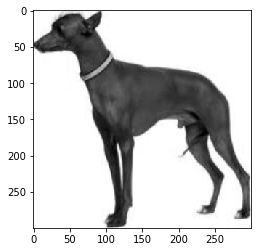

In [77]:
img = cv2.imread('images/image_4a.png', 0)
img = cv2.resize(img, (300,300))
plt.imshow(img, cmap='gray')

img = img.flatten()
img = img.reshape(1,90000)

img_projecao = pca_components.dot(img.T).T

print(img_projecao.shape)
print(img_projecao)

distancia = (projection - img_projecao)**2
distancia = np.sum(distancia, axis=1)
distancia = distancia**1/2
print(distancia)
menor_distancia = np.argmin(distancia)
print(menor_distancia)
if menor_distancia in range(0, 3):
    print('Gato')
elif menor_distancia in range(3, 6):
    print('Camaleao')
elif menor_distancia in range(6, 9):
    print('Cachorro')
elif menor_distancia in range(9, 12):
    print('Bode')

# PCA e projeções usando sklearn

(1, 11)
[[-1.32884590e+09  2.03860364e+09  3.45732393e+08  1.86095905e+08
   5.14630387e+08  1.44833003e+09 -1.11119992e+07 -4.26723349e+08
  -6.22172192e+08 -1.65338585e+09  7.40158271e+08]]
[3.18326005e+19 2.41417711e+19 2.19388080e+19 7.59060231e+17
 2.89376534e+17 8.46534761e+18 3.27404342e+19 1.65447080e+18
 2.30245774e+18 4.79673257e+18 1.24625731e+18 2.70783693e+18]
4
Camaleao


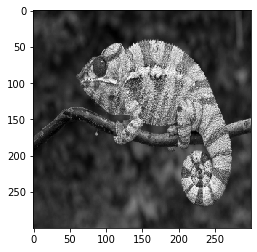

In [78]:
img = cv2.imread('images/image_4b.png', 0)
img = cv2.resize(img, (300,300))
plt.imshow(img, cmap='gray')

img = img.flatten()
img = img.reshape(1,90000)

img_projecao = pca_components.dot(img.T).T

print(img_projecao.shape)
print(img_projecao)

distancia = (projection - img_projecao)**2
distancia = np.sum(distancia, axis=1)
distancia = distancia**1/2
print(distancia)
menor_distancia = np.argmin(distancia)
print(menor_distancia)
if menor_distancia in range(0, 3):
    print('Gato')
elif menor_distancia in range(3, 6):
    print('Camaleao')
elif menor_distancia in range(6, 9):
    print('Cachorro')
elif menor_distancia in range(9, 12):
    print('Bode')

import pandas as pd

train_images_pd = pd.DataFrame([])
for i in range(train_images.shape[0]):
    train_images_pd = train_images_pd.append(pd.Series(train_images[i].flatten(), name=str(i)))

(1, 11)
[[-4.61017674e+09  5.89072556e+09  9.46740898e+08  5.75524099e+08
   1.40569024e+09  4.03205437e+09  4.57937642e+06 -1.19334800e+09
  -1.80896873e+09 -4.73897400e+09  2.14807868e+09]]
[6.33289646e+17 1.46388079e+16 9.54557262e+16 1.65932996e+19
 2.89838857e+19 3.82042971e+18 7.71010479e+17 1.27770545e+19
 1.11661977e+19 7.11788556e+18 1.41727236e+19 1.06388360e+19]
1
Gato


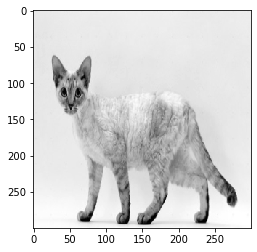

In [79]:
img = cv2.imread('images/image_4c.png', 0)
img = cv2.resize(img, (300,300))
plt.imshow(img, cmap='gray')

img = img.flatten()
img = img.reshape(1,90000)

img_projecao = pca_components.dot(img.T).T

print(img_projecao.shape)
print(img_projecao)

distancia = (projection - img_projecao)**2
distancia = np.sum(distancia, axis=1)
distancia = distancia**1/2
print(distancia)
menor_distancia = np.argmin(distancia)
print(menor_distancia)
if menor_distancia in range(0, 3):
    print('Gato')
elif menor_distancia in range(3, 6):
    print('Camaleao')
elif menor_distancia in range(6, 9):
    print('Cachorro')
elif menor_distancia in range(9, 12):
    print('Bode')

(1, 11)
[[-3.16748417e+09  4.16310297e+09  6.62915766e+08  3.95530472e+08
   1.01381343e+09  2.85860296e+09  2.12830848e+07 -8.56311757e+08
  -1.29151683e+09 -3.35434156e+09  1.52804707e+09]]
[8.75004996e+18 4.96757844e+18 4.02633512e+18 3.71168411e+18
 1.03512061e+19 8.04655409e+16 9.23107202e+18 1.99186893e+18
 1.38733676e+18 2.66298824e+17 2.57358003e+18 1.26437263e+18]
5
Camaleao


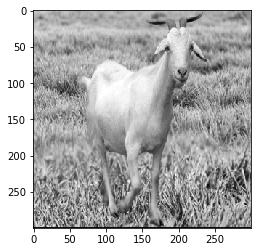

In [80]:
img = cv2.imread('images/image_4d.png', 0)
img = cv2.resize(img, (300,300))
plt.imshow(img, cmap='gray')

img = img.flatten()
img = img.reshape(1,90000)

img_projecao = pca_components.dot(img.T).T

print(img_projecao.shape)
print(img_projecao)

distancia = (projection - img_projecao)**2
distancia = np.sum(distancia, axis=1)
distancia = distancia**1/2
print(distancia)
menor_distancia = np.argmin(distancia)
print(menor_distancia)
if menor_distancia in range(0, 3):
    print('Gato')
elif menor_distancia in range(3, 6):
    print('Camaleao')
elif menor_distancia in range(6, 9):
    print('Cachorro')
elif menor_distancia in range(9, 12):
    print('Bode')

# Usando PCA do sklearn

In [81]:
train_images.shape

(12, 90000)

In [82]:
from sklearn.decomposition import PCA
animals_pca = PCA(n_components=11)
animals_pca.fit(train_images_pd)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [83]:
animals_pca.components_.shape

(11, 90000)

In [84]:
animals_pca.explained_variance_

array([3.60132057e+08, 5.64331289e+07, 3.10916491e+07, 2.16900762e+07,
       1.86266005e+07, 1.67971335e+07, 1.28946838e+07, 1.22139619e+07,
       9.01710447e+06, 7.63022558e+06, 6.54338333e+06])

In [85]:
components = animals_pca.transform(train_images_pd)
components.shape

(12, 11)

In [86]:
print(components)

[[-26698.86982568   2434.40856862  -1843.67963485   1738.5814427
    -252.44637776   2186.92695344  -1995.13961241   1926.53018316
    2165.51371525  -4343.26282      5023.87387953]
 [-20069.62685195   1285.39709898   -727.33096671  -4318.81640327
    5095.02346998  -2521.24499601   5894.92743137  -3255.3637335
    4644.27598846    984.51862036  -1157.91237886]
 [-20230.87889014  -6528.60459169   4666.26439824  -6936.7203933
    -165.94623226  -1234.52755478  -4287.57323115  -2029.2947892
   -3920.13249973  -2409.36993772  -2496.81865619]
 [ 19824.13228195  15431.10002451  11676.0720229   -1172.89720981
    1370.88286394    -92.77730322   -943.02218394   1164.10302371
     551.76466502   -167.4986474     191.48821002]
 [ 28372.75600632  -2813.36150313  -6433.82271354  -3006.51185022
   -1621.6014287    1054.22025457  -5042.77748279    216.19500567
    5236.70668958   -878.70405427  -2036.73267361]
 [ -1023.74662054   6484.89324317  -2991.68088924   4137.53768539
   -8324.04622501  -420

IndexError: index 11 is out of bounds for axis 0 with size 11

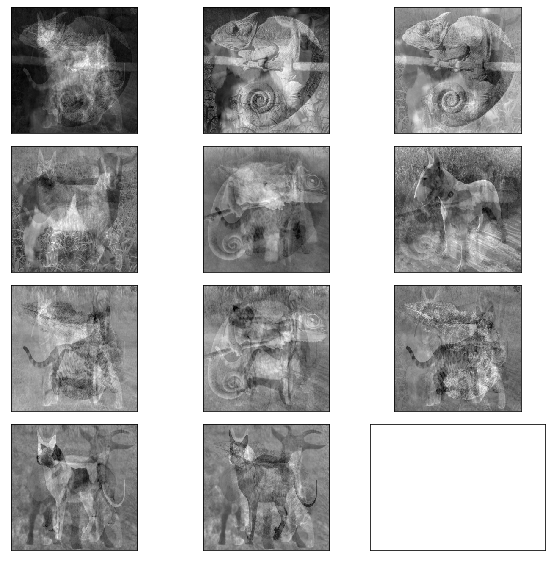

In [87]:
fig, axes = plt.subplots(4, 3, figsize=(10, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(animals_pca.components_[i].reshape(300, 300), cmap='gray')

In [88]:
projetado = animals_pca.inverse_transform(components)

In [89]:
projetado.shape

(12, 90000)

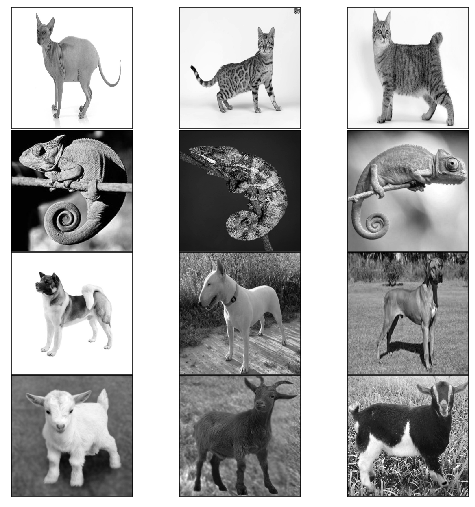

In [90]:
fig, axes = plt.subplots(4,3,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projetado[i].reshape(300,300),cmap='gray')

[1.00886455e+08 1.55445532e+08 1.11513835e+08 8.91511169e+08
 1.15004425e+09 3.32595698e+08 1.11382641e+08 5.76253176e+08
 4.62676000e+08 4.86220492e+08 5.15113769e+08 4.52455405e+08]
########################
Menor distância
0
Gato
########################
Segunda Menor distância
6
Cachorro


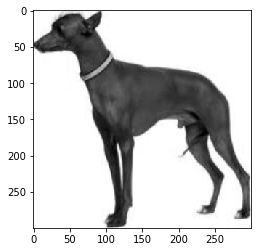

In [107]:
import heapq

img = cv2.imread('images/image_4a.png', 0)
img = cv2.resize(img, (300,300))
plt.imshow(img, cmap='gray')

img = img.flatten()
img = img.reshape(1,90000)

img_components = animals_pca.transform(img)

distancia = (components - img_components)**2
distancia = np.sum(distancia, axis=1)
distancia = distancia**1/2
print(distancia)

print('########################')
print('Menor distância')
menor_distancia = np.argmin(distancia)
print(menor_distancia)
if menor_distancia in range(0, 3):
    print('Gato')
elif menor_distancia in range(3, 6):
    print('Camaleao')
elif menor_distancia in range(6, 9):
    print('Cachorro')
elif menor_distancia in range(9, 12):
    print('Bode')
    
print('########################')
print('Segunda Menor distância')
segunda_menor_distancia = heapq.nsmallest(2, distancia)[-1]
segunda_menor_distancia = np.where(distancia == segunda_menor_distancia)
segunda_menor_distancia = segunda_menor_distancia[0][0]
print(segunda_menor_distancia)
if segunda_menor_distancia in range(0, 3):
    print('Gato')
elif segunda_menor_distancia in range(3, 6):
    print('Camaleao')
elif segunda_menor_distancia in range(6, 9):
    print('Cachorro')
elif segunda_menor_distancia in range(9, 12):
    print('Bode')

[1.31778454e+09 1.03755067e+09 1.07492871e+09 2.47274044e+08
 5.08473329e+07 4.16783611e+08 1.39325097e+09 1.56115982e+08
 1.71525463e+08 2.26797454e+08 1.64657853e+08 3.81129110e+08]
########################
Menor distância
4
Camaleao


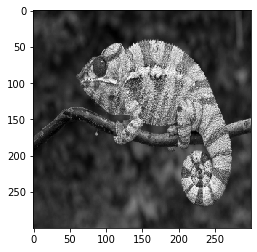

In [103]:
img = cv2.imread('images/image_4b.png', 0)
img = cv2.resize(img, (300,300))
plt.imshow(img, cmap='gray')

img = img.flatten()
img = img.reshape(1,90000)

img_components = animals_pca.transform(img)

distancia = (components - img_components)**2
distancia = np.sum(distancia, axis=1)
distancia = distancia**1/2
print(distancia)

print('########################')
print('Menor distância')
menor_distancia = np.argmin(distancia)
print(menor_distancia)
if menor_distancia in range(0, 3):
    print('Gato')
elif menor_distancia in range(3, 6):
    print('Camaleao')
elif menor_distancia in range(6, 9):
    print('Cachorro')
elif menor_distancia in range(9, 12):
    print('Bode')

[8.47898585e+07 5.86943590e+07 1.41308787e+08 9.59518041e+08
 1.19788657e+09 2.76222968e+08 1.17979536e+08 5.84588643e+08
 5.04026186e+08 3.36542895e+08 5.80847068e+08 5.55447299e+08]
########################
Menor distância
1
Gato


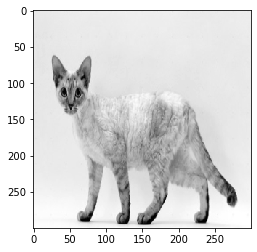

In [104]:
img = cv2.imread('images/image_4c.png', 0)
img = cv2.resize(img, (300,300))
plt.imshow(img, cmap='gray')

img = img.flatten()
img = img.reshape(1,90000)

img_components = animals_pca.transform(img)

distancia = (components - img_components)**2
distancia = np.sum(distancia, axis=1)
distancia = distancia**1/2
print(distancia)

print('########################')
print('Menor distância')
menor_distancia = np.argmin(distancia)
print(menor_distancia)
if menor_distancia in range(0, 3):
    print('Gato')
elif menor_distancia in range(3, 6):
    print('Camaleao')
elif menor_distancia in range(6, 9):
    print('Cachorro')
elif menor_distancia in range(9, 12):
    print('Bode')

[4.20330139e+08 2.41172478e+08 3.34158022e+08 4.26550154e+08
 4.73446209e+08 1.18427074e+08 4.59363726e+08 1.75392484e+08
 1.25762106e+08 7.11252394e+07 1.63786692e+08 2.26232348e+08]
########################
Menor distância
9
Bode


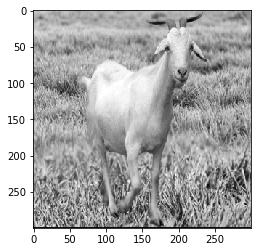

In [105]:
img = cv2.imread('images/image_4d.png', 0)
img = cv2.resize(img, (300,300))
plt.imshow(img, cmap='gray')

img = img.flatten()
img = img.reshape(1,90000)

img_components = animals_pca.transform(img)

distancia = (components - img_components)**2
distancia = np.sum(distancia, axis=1)
distancia = distancia**1/2
print(distancia)

print('########################')
print('Menor distância')
menor_distancia = np.argmin(distancia)
print(menor_distancia)
if menor_distancia in range(0, 3):
    print('Gato')
elif menor_distancia in range(3, 6):
    print('Camaleao')
elif menor_distancia in range(6, 9):
    print('Cachorro')
elif menor_distancia in range(9, 12):
    print('Bode')